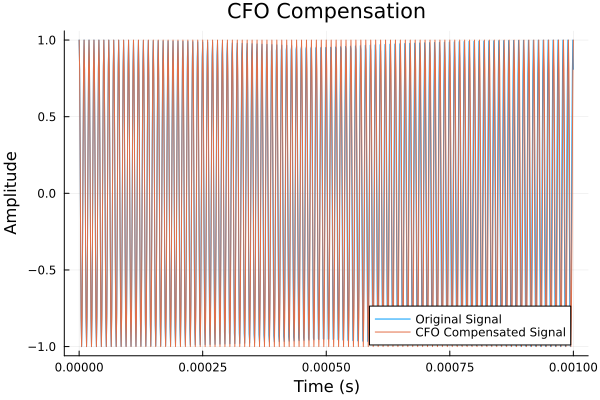

In [1]:
using Plots

# Parameters
fs = 1e6  # Sampling frequency in Hz
cfo = 100  # Estimated CFO in Hz
duration = 1e-3  # Signal duration in seconds
t = 0:1/fs:duration  # Time vector

# Simulated received signal (e.g., a complex sinusoid affected by CFO)
# Assuming a 100 kHz tone with CFO
r = exp.(1im .* 2 .* π .* 100e3 .* t) .* exp.(1im .* 2 .* π .* cfo .* t)

# CFO Correction
s = r .* exp.(-1im .* 2 .* π .* cfo .* t)

# Plotting the real part of the original and corrected signals
plot(t, real(r), label="Original Signal")
plot!(t, real(s), label="CFO Compensated Signal", title="CFO Compensation", xlabel="Time (s)", ylabel="Amplitude")


# References
Compensating for Carrier Frequency Offset (CFO) is a critical task in wireless communications to ensure accurate data recovery. CFO occurs when there's a mismatch between the transmitter's and receiver's oscillator frequencies. This mismatch can introduce a phase rotation in the received signal, leading to demodulation errors. The process to compensate for CFO typically involves estimating the offset and then correcting it. Here’s a conceptual overview of how CFO compensation might be approached, especially in a context where signals are represented as complex numbers:

### 1. CFO Estimation

First, you need to estimate the CFO. This can be achieved through various methods, such as:

- **Using known pilot symbols** or preambles that are periodically inserted into the transmitted signal. By comparing the phase change of these known symbols at the receiver, the CFO can be estimated.
- **Using the cyclic prefix** in OFDM systems, where the CFO causes a predictable phase shift across subcarriers that can be detected and measured.
- **Using correlation methods** that exploit specific properties of the transmitted signal, like periodicity, to estimate the frequency offset.

### 2. CFO Correction

After estimating the CFO, the next step is to correct it. This is done by adjusting the phase of the received signal to counteract the phase rotation introduced by the CFO. In terms of complex number operations, the correction involves:

- **Multiplying the received signal by a complex exponential** that rotates the phase in the opposite direction of the CFO-induced rotation. If the estimated CFO is \(\Delta f\), and the received complex baseband signal at time \(t\) is \(r(t)\), then the corrected signal \(s(t)\) can be given by:
  \[ s(t) = r(t) \cdot e^{-j2\pi\Delta ft} \]
  where \(j\) is the imaginary unit, and \(\Delta f\) is the frequency offset.

### Implementation in Code

Here's a simple conceptual Python example that demonstrates the CFO compensation process. This example assumes you have already estimated the CFO (\(\Delta f\)) and focuses on the correction part:

```python
import numpy as np

# Parameters
fs = 1e6  # Sampling frequency in Hz
cfo = 100  # Estimated CFO in Hz
t = np.arange(0, 1e-3, 1/fs)  # Time vector for 1 ms

# Simulated received signal (e.g., a complex sinusoid affected by CFO)
r = np.exp(1j*2*np.pi*(100e3)*t) * np.exp(1j*2*np.pi*cfo*t)  # 100 kHz tone with CFO

# CFO Correction
s = r * np.exp(-1j*2*np.pi*cfo*t)

# The 's' variable now holds the CFO-compensated signal
```

This example uses a simple exponential correction based on the estimated CFO. In a real-world scenario, accurate CFO estimation is key to effective compensation, and the estimation process itself can be quite complex, often involving sophisticated algorithms to ensure accuracy under various signal conditions.

CFO compensation is essential in many communication systems, including OFDM (used in LTE, Wi-Fi, and 5G), to prevent inter-carrier interference (ICI) and to ensure the coherent demodulation of the received signal.

To perform Carrier Frequency Offset (CFO) compensation in Julia, you can follow a similar approach to the Python example, using Julia's syntax and capabilities. Julia provides efficient and concise ways to handle complex numbers and perform array operations, which makes it suitable for signal processing tasks like CFO compensation.

Here's how you can implement CFO compensation in Julia:

```julia
using Plots

# Parameters
fs = 1e6  # Sampling frequency in Hz
cfo = 100  # Estimated CFO in Hz
duration = 1e-3  # Signal duration in seconds
t = 0:1/fs:duration  # Time vector

# Simulated received signal (e.g., a complex sinusoid affected by CFO)
# Assuming a 100 kHz tone with CFO
r = exp.(1im .* 2 .* π .* 100e3 .* t) .* exp.(1im .* 2 .* π .* cfo .* t)

# CFO Correction
s = r .* exp.(-1im .* 2 .* π .* cfo .* t)

# Plotting the real part of the original and corrected signals
plot(t, real(r), label="Original Signal")
plot!(t, real(s), label="CFO Compensated Signal", title="CFO Compensation", xlabel="Time (s)", ylabel="Amplitude")
```

This Julia script performs the following steps:
1. **Define Parameters**: Set up the basic parameters for the simulation, including the sampling frequency (`fs`), the estimated CFO (`cfo`), and the duration of the signal.
2. **Generate Time Vector**: Create a time vector `t` that spans the desired duration of the signal.
3. **Simulate Received Signal**: Generate a complex sinusoidal signal `r` representing the received signal affected by CFO. This signal is a complex exponential representing a 100 kHz tone that has been shifted in frequency by the CFO.
4. **Compensate for CFO**: Apply CFO compensation to the received signal `r` by multiplying it with a complex exponential that counteracts the CFO, resulting in the corrected signal `s`.
5. **Plot Results**: Use the `Plots` package to visualize the real parts of the original and compensated signals for comparison.

This example assumes you have already estimated the CFO. In practice, CFO estimation would be done using one of several possible methods, depending on the specifics of your system and the nature of the signals you're working with.

To run this script, you'll need to have Julia installed on your system, along with the `Plots` package, which you can add using Julia's package manager:

```julia
using Pkg
Pkg.add("Plots")
```

This simple example demonstrates CFO compensation in a controlled scenario. Real-world applications might require more sophisticated estimation and compensation techniques, especially in the presence of noise and other channel effects.